In [33]:
import networkx as nx
from zipfile import ZipFile 
import pandas as pd
import os
import numpy as np

In [22]:
# load the data file
with zipfile.ZipFile("Philippines Bombing 2000 CSV.zip", 'r') as zip_ref:
    zip_ref.extractall("target_folder")

In [26]:
df = pd.read_csv("target_folder/CSV/PHILBOMB_2000_2000.csv", index_col=0)

In [29]:
# Convert index and columns to int or str (depending on consistency)
df.index = df.index.astype(str)
df.columns = df.columns.astype(str)

In [30]:
# Create the graph 
G = nx.from_pandas_adjacency(df)

In [31]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
# There are 16 nodes and 69 edges 

Number of nodes: 16
Number of edges: 69


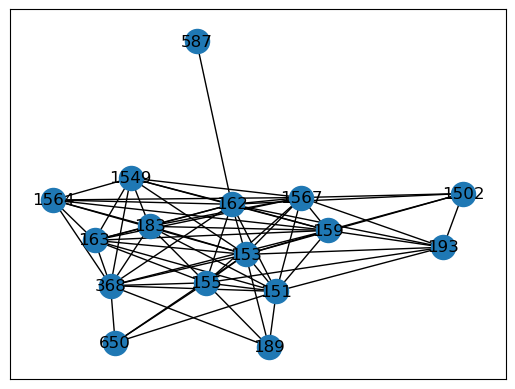

In [53]:
# visulization before remove the weakest link
nx.draw_networkx(G)

In [41]:
# get all edges with weights
edges_with_weights = list(G.edges(data='weight'))
print(edges_with_weights)

[('151', '153', 2), ('151', '155', 2), ('151', '159', 1), ('151', '162', 2), ('151', '163', 2), ('151', '183', 2), ('151', '189', 2), ('151', '193', 1), ('151', '368', 2), ('151', '650', 2), ('151', '1567', 1), ('153', '155', 2), ('153', '159', 2), ('153', '162', 2), ('153', '163', 2), ('153', '183', 2), ('153', '189', 2), ('153', '193', 2), ('153', '368', 2), ('153', '650', 2), ('153', '1567', 2), ('153', '1502', 2), ('153', '1549', 2), ('153', '1564', 2), ('155', '162', 3), ('155', '163', 3), ('155', '183', 2), ('155', '189', 2), ('155', '193', 2), ('155', '368', 2), ('155', '650', 2), ('155', '1567', 1), ('159', '162', 1), ('159', '163', 1), ('159', '183', 1), ('159', '193', 2), ('159', '368', 2), ('159', '1567', 2), ('159', '1502', 2), ('159', '1549', 1), ('159', '1564', 1), ('162', '163', 3), ('162', '183', 2), ('162', '193', 2), ('162', '368', 1), ('162', '1567', 2), ('162', '1502', 2), ('162', '1549', 2), ('162', '1564', 2), ('162', '587', 1), ('163', '183', 2), ('163', '368', 1

In [42]:
# filter out edges with weight
valid_edges = [edge for edge in edges_with_weights if edge[2] > 0]

# get the edge with the minimum weight
weakest_link = min(valid_edges, key=lambda x: x[2])
print("Weakest link:", weakest_link)

Weakest link: ('151', '159', 1)


In [50]:
# remove the weakest edge
G_removed = G.copy()
G_removed.remove_edge('151', '159')

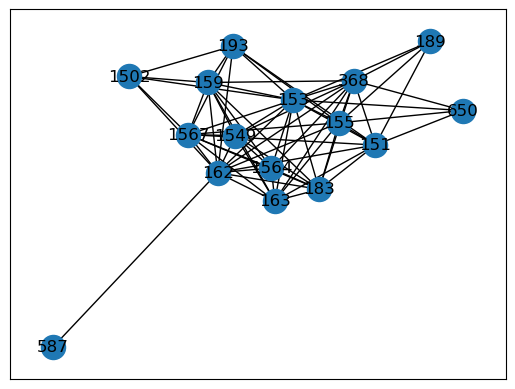

In [54]:
# visulization after remove the weakest edge
nx.draw_networkx(G_removed)

In [52]:
# check if there are still connected by some other path 
nx.has_path(G_removed, '151', '159')

True

In [ ]:
# My Observations: Nodes 151 and 159 (the weakest link) remain connected through alternate paths, even after their direct (weakest) link was removed. 
# After removing the weakest connection between two nodes did not break their communication entirely. Interestingly, the network became less sparse and more clustered, potentially reflecting stronger internal bonding or reinforced subgroups after pruning weaker ties.